# **Title: MaskGuard - AI Facemask Detection: Using Machine Learning to Improve Public Health**


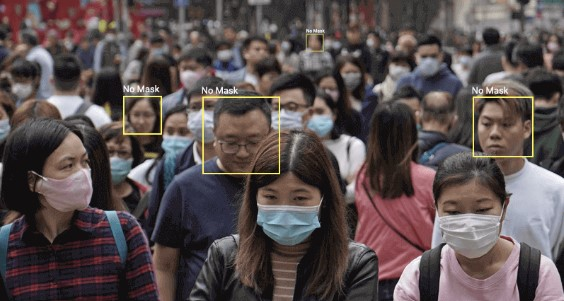

# Overview / Introduction
This project uses the power of Artificial Intelligence (AI) to help public health. We focus on using Machine Learning (ML) to detect if people are wearing facemasks in public, a key way to slow the spread of diseases like COVID-19. By using Image Processing and Deep Learning, we aim to create a tool that can check mask usage in real time.

# Problem Statement
Wearing facemasks has become a crucial part of public health rules around the world because of diseases like COVID-19. But checking if everyone is wearing masks in public is a big task and can be full of mistakes. The project aims to make this easier by using AI to check mask usage, helping to slow the spread of disease and keep our communities safe.

# Objectives
1. Develop an AI tool that can accurately tell if a mask is being worn in real time.
2. Use existing images to teach and check our machine learning tool.
3. Test how well our tool works in different public settings and keep improving it.
4. Share our tool as open-source so it can be added to existing camera systems and help improve public health.

# Dataset Description
The dataset for this project comes from a variety of sources and is designed for Facemask Detection. It contains around 1350 images split into two groups - images of people wearing facemasks and images of people not wearing facemasks. These groups are marked as Class 0 and Class 1.

The "Official" Notebook gives you the code you need to work with this dataset, making it easier to use machine learning.

Here's a brief overview of the dataset:

**ClassId**
- Description: The ClassId shows whether a facemask is worn in the image.
- Total Values: 1350
- Unique Values: 2
    - Class 0: Images of people not wearing a facemask.
    - Class 1: Images of people wearing a facemask.

This dataset and the provided code form a strong starting point for creating and testing a useful facemask detection tool.

**Dataset URL:** https://www.kaggle.com/datasets/ahemateja19bec1025/facemask-dataset

# Technologies Used

This project utilized Python, a high-level programming language that offers comprehensive libraries and frameworks, along with TensorFlow and Keras, for building and training the deep learning models. TensorFlow provides a robust framework for computation and represents computations as graphs, while Keras is a user-friendly neural network library written in Python. The PIL library was used to handle images, and Matplotlib was used to visualize data.

# Methodology

The code begins by dividing the dataset into training and testing sets. It randomly shuffles the files and splits them into training and testing sets, based on the defined ratio. The images are then copied into the respective directories.

Pandas is used to create a dataframe, which stores image data and labels. This is followed by the generation of pie and bar charts to show the frequency of classes. Next, the code displays random images from the dataset along with their labels.

Then, several models are developed, trained, and tested: Conv2D, Flatten, a model with data augmentation, a bigger Conv2D model, a model based on MobileNet, and finally a model based on Inception V3. Each model uses binary cross-entropy as the loss function, Adam as the optimizer, and accuracy as the metric.

## Results

The evaluation conducted on several deep learning models led to the following results:

Model|Loss|Accuracy
---|---|---
mobilenet|0.000176|1.000000
model_inception|0.000867|1.000000
model_conv_lg|0.005420|0.998767
model_conv|0.010480|0.997534
model_aug|0.033959|0.990136
model_ft|0.129110|0.948212

## Discussion

- Upon examining these results, the "mobilenet" and "model_inception" models exhibited the highest accuracy scores of 1.0. The perfect accuracy demonstrates that these models can efficiently and effectively classify the test data without any misclassifications.

- The "model_conv_lg" was the next highest-performing model, achieving an accuracy of 0.998767. Although slightly lower than the top two, this score represents an impressive ability to generalize and classify correctly. The model's low loss value of 0.005420 reinforces this, suggesting only a minor amount of error in its predictions.

- Following this, the "model_conv" achieved an accuracy of 0.997534 with a slightly higher loss value of 0.010480. While not as precise as the previous models, this model also displayed a strong performance, indicating a high level of correct classifications.

- The "model_aug" achieved a moderate accuracy of 0.990136, which, while lower than the previous models, still indicates a relatively high proficiency in classifying the data. However, its loss value of 0.033959 suggests a higher error rate in its predictions.

- The "model_ft" had the lowest accuracy of the evaluated models at 0.948212, along with the highest loss value of 0.129110. This suggests that this model has more difficulty correctly classifying the data than the others, and the higher loss indicates a significant amount of error in its predictions.

## Summary

In summary, while all models performed relatively well, the "mobilenet" and "model_inception" models stood out as the best performers, achieving perfect accuracy scores. The "model_conv_lg" and "model_conv" also exhibited strong performances, with high accuracy and low loss values. The "model_aug" and "model_ft" models performed decently but had room for improvement. These findings can guide the selection of models for future tasks, favoring those that exhibited the highest accuracy and lowest loss values in this evaluation.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facemask-dataset/labels_FaceMask.csv
/kaggle/input/facemask-dataset/dataset/dataset/0/augmented_image_155.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/208.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/augmented_image_114.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/45.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/56.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/augmented_image_294.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/89.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/20.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/augmented_image_80.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/275.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/augmented_image_160.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/212.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/augmented_image_85.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/239.jpg
/kaggle/input/facemask-dataset/dataset/dataset/0/58.jpg
/kagg

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2023-07-09 23:26:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-09 23:26:53 (60.7 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Next, the code defines the base directory for the dataset.

In [ ]:
base_dir="/kaggle/input/facemask-dataset/dataset/dataset/"

Then, it walks through the base directory and lists the number of directories and images in each directory.

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk(base_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/kaggle/input/facemask-dataset/dataset/dataset/'.
There are 0 directories and 686 images in '/kaggle/input/facemask-dataset/dataset/dataset/0'.
There are 0 directories and 690 images in '/kaggle/input/facemask-dataset/dataset/dataset/1'.


The code imports pathlib and creates a Path object, data_dir, from base_dir. It retrieves and sorts the subdirectory names within data_dir, assigning them to class_names as a NumPy array. It converts the array to a list, calculates n_classes, and prints the class names and the total number of classes.

In [ ]:
import pathlib
data_dir = pathlib.Path(base_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names = class_names.tolist() # convert numpy array to list
n_classes = len(class_names)
print(class_names, n_classes)

['0', '1'] 2


**Generate train and test folders**

The next code block performs data preprocessing and prepares the dataset for training. The code block starts by defining the working directory and the train-test split ratio. Then, for each class in the dataset, the code retrieves the list of all images, shuffles the file list randomly, and splits it into training and testing sets based on the defined split ratio. The code creates train and test directories in the working directory and copies the images into their respective directories.

In [ ]:
import os
import shutil
import numpy as np

working_dir = '/kaggle/working/'

# Define train and test split ratio
train_ratio = 0.8

for cls in class_names:
    # Get list of all images
    src_dir = os.path.join(base_dir, cls)
    all_files = os.listdir(src_dir)

    # Randomly shuffle the file list
    np.random.shuffle(all_files)

    # Split into training and testing sets
    train_files = all_files[:int(len(all_files)*train_ratio)]
    test_files = all_files[int(len(all_files)*train_ratio):]

    # Create train and test directories
    train_dir = os.path.join(working_dir, 'Train', cls)
    test_dir = os.path.join(working_dir, 'Test', cls)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Copy images into respective directories
    for file in train_files:
        shutil.copy(os.path.join(src_dir, file), train_dir)
    for file in test_files:
        shutil.copy(os.path.join(src_dir, file), test_dir)

main_dir="/kaggle/working/"

Then, the code walks through the main directory and lists the number of directories and images in each directory.

In [ ]:
# Walk through main directory and list number of files
for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 6 directories and 7 images in '/kaggle/working/'.
There are 2 directories and 3 images in '/kaggle/working/model_checkpoint'.
There are 0 directories and 2 images in '/kaggle/working/model_checkpoint/variables'.
There are 0 directories and 0 images in '/kaggle/working/model_checkpoint/assets'.
There are 2 directories and 0 images in '/kaggle/working/Test'.
There are 0 directories and 412 images in '/kaggle/working/Test/1'.
There are 0 directories and 399 images in '/kaggle/working/Test/0'.
There are 0 directories and 1 images in '/kaggle/working/__pycache__'.
There are 2 directories and 3 images in '/kaggle/working/model_checkpoint_conv4'.
There are 0 directories and 2 images in '/kaggle/working/model_checkpoint_conv4/variables'.
There are 0 directories and 0 images in '/kaggle/working/model_checkpoint_conv4/assets'.
There are 0 directories and 0 images in '/kaggle/working/.virtual_documents'.
There are 2 directories and 0 images in '/kaggle/working/Train'.
There are 0 direct

We now define the training and testing directories.

In [ ]:
train_dir="/kaggle/working/Train/"
test_dir = "/kaggle/working/Test/"

**Create Pandas Dataframe**

Following that, the code creates a dataframe containing information about the images, including the class name, type (training or testing), image path, and image size.

In [ ]:
from PIL import Image

# dir_dict = {train_dir: "Training", test_dir: "Testing", val_dir: "Validation"}
dir_dict = {train_dir: "Training", test_dir: "Testing"}

data = []

for type_dir, type_label in dir_dict.items():
    for class_name in class_names:
        target_folder = os.path.join(type_dir, class_name)
        for image_file in os.listdir(target_folder):
            img_path = os.path.join(target_folder, image_file)
            with Image.open(img_path) as img:
                data.append({
                    'class_name': class_name,
                    'type': type_label,
                    'img_path': img_path,
                    'shapes': img.size + (len(img.getbands()),)
                })

df = pd.DataFrame(data)
df.head()

class_name      type                                         img_path  \
0          0  Training                  /kaggle/working/Train/0/215.jpg   
1          0  Training   /kaggle/working/Train/0/augmented_image_51.jpg   
2          0  Training  /kaggle/working/Train/0/augmented_image_191.jpg   
3          0  Training   /kaggle/working/Train/0/augmented_image_44.jpg   
4          0  Training                   /kaggle/working/Train/0/37.jpg   

          shapes  
0  (320, 428, 3)  
1  (320, 428, 3)  
2  (320, 428, 3)  
3  (320, 428, 3)  
4  (191, 213, 3)

In [ ]:
df.type.value_counts()

Training    1373
Testing      811
Name: type, dtype: int64

In [ ]:
df.class_name.value_counts()

1    1101
0    1083
Name: class_name, dtype: int64

In [ ]:
df.shapes.value_counts()

(320, 428, 3)    591
(320, 433, 3)    151
(327, 433, 3)     80
(225, 225, 3)     38
(183, 275, 3)     28
                ... 
(512, 594, 3)      1
(293, 328, 3)      1
(261, 193, 3)      1
(345, 362, 3)      1
(290, 174, 3)      1
Name: shapes, Length: 257, dtype: int64

The code then creates separate dataframes for training and testing.

In [ ]:
# Create separate dataframes for Training and Testing
df_train = df[df['type'] == 'Training']
df_test = df[df['type'] == 'Testing']

df_test.head()

class_name     type                                        img_path  \
1373          0  Testing                  /kaggle/working/Test/0/215.jpg   
1374          0  Testing   /kaggle/working/Test/0/augmented_image_51.jpg   
1375          0  Testing  /kaggle/working/Test/0/augmented_image_191.jpg   
1376          0  Testing   /kaggle/working/Test/0/augmented_image_44.jpg   
1377          0  Testing                   /kaggle/working/Test/0/37.jpg   

             shapes  
1373  (320, 428, 3)  
1374  (320, 428, 3)  
1375  (320, 428, 3)  
1376  (320, 428, 3)  
1377  (191, 213, 3)

In [ ]:
df_train.class_name.value_counts()

1    689
0    684
Name: class_name, dtype: int64

In [ ]:
df_test.class_name.value_counts()

1    412
0    399
Name: class_name, dtype: int64

After that, the code plots a pie chart and a bar chart to visualize the class frequencies in the dataset.

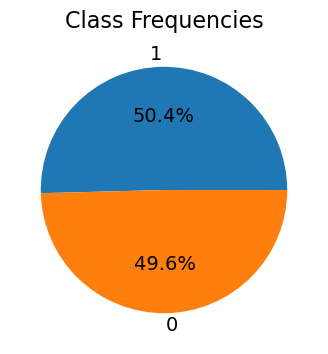

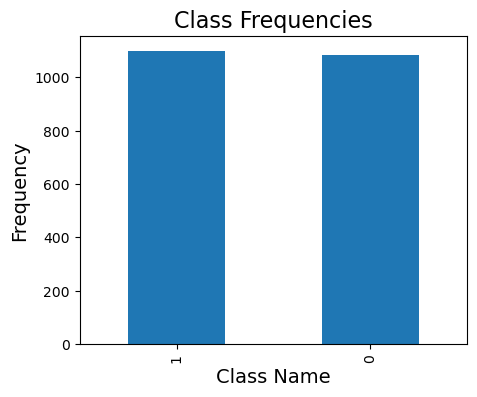

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a pie chart of class frequencies
plt.figure(figsize=(5, 4))
df['class_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Class Frequencies', fontsize=16)
plt.ylabel('')
plt.show()
print()

plt.figure(figsize=(5, 4))
df['class_name'].value_counts().plot(kind='bar')
plt.title('Class Frequencies', fontsize=16)
plt.xlabel('Class Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

**Visualize random predictions**

The code then displays a random sample of 16 images from the dataset along with their labels.

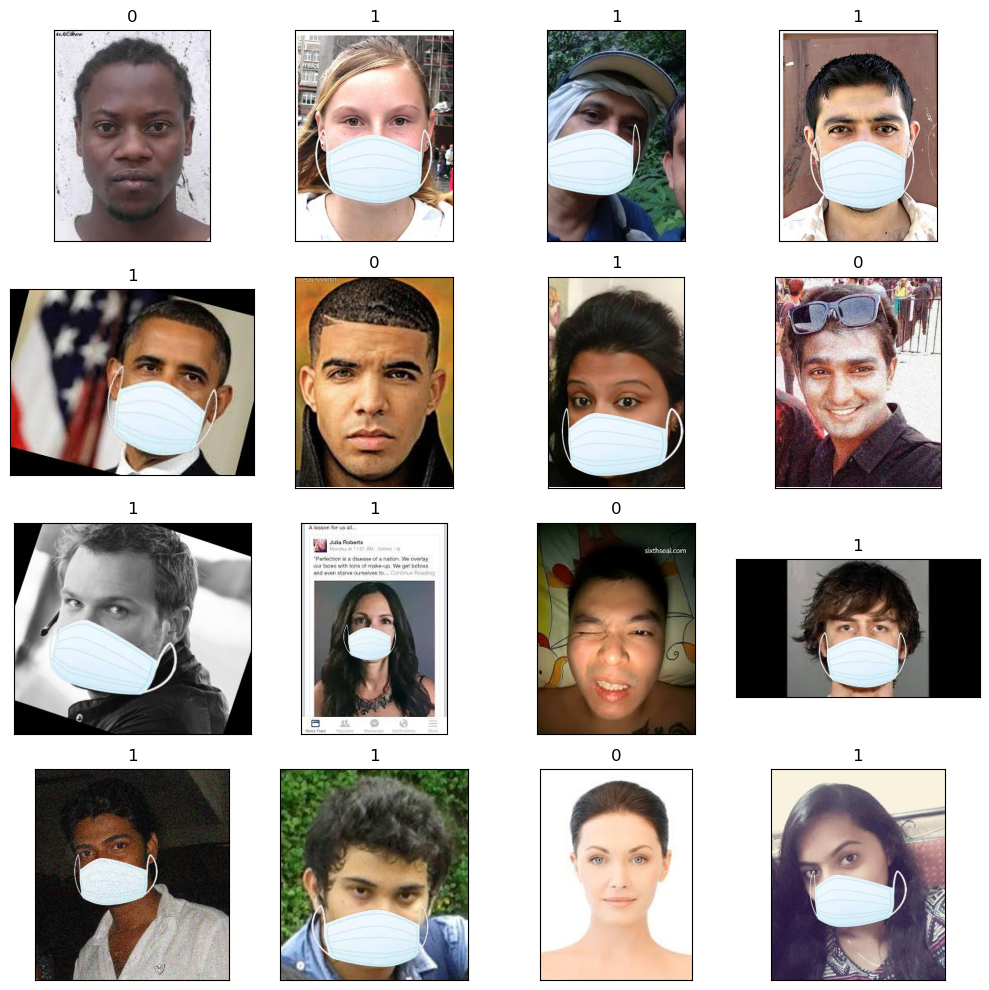

In [ ]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.img_path[random_index[i]]))
    ax.set_title(df.class_name[random_index[i]])
plt.tight_layout()
plt.show()

**Visualize random images by category**

The next code block creates a list to store random indices for each class in the dataframe. It iterates over each unique class and selects random indices for each class, ensuring that at least 5 instances are selected if available. It then plots the selected random images from each class.

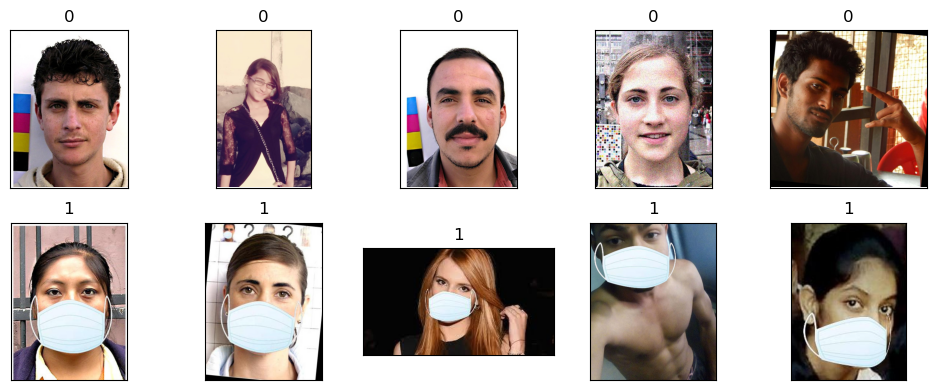

In [ ]:
# Here we create a list to store the random indices for each class
indices = []

# We iterate over each unique class in the DataFrame
for class_name in df['class_name'].unique():
    class_indices = df[df['class_name'] == class_name].index
    if len(class_indices) >= 5:
        # Select random indices from this class
        random_indices = np.random.choice(class_indices, 5, replace=False)
    else:
        # If the class has less than 5 instances, select all of them
        random_indices = class_indices
    indices.extend(random_indices)

# Plot the selected random images from each class
fig, axes = plt.subplots(nrows=len(indices)//5, ncols=5, figsize=(10, len(indices)//5*2),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.img_path[indices[i]]))
    ax.set_title(df.class_name[indices[i]])
plt.tight_layout()
plt.show()

The next code creates a training dataset by loading images from a specified directory. The images are resized to the defined image size and labeled as binary. The batch size is set to 32. Similarly, the next code creates a test dataset by loading images from another directory. The images are resized and labeled as binary.

In [ ]:
import tensorflow as tf

# Define image size
IMG_SIZE = (224, 224)

# Create a training dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="binary",
    batch_size=32  # This is generally a good batch size
)

# Create a test dataset
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="binary",
)


Found 1373 files belonging to 2 classes.
Found 811 files belonging to 2 classes.


The AUTOTUNE variable is set to a TensorFlow constant that optimizes the performance of data loading. The training and test datasets are then processed for better performance by caching and prefetching the data.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

A normalization layer is defined to rescale the pixel values of the training dataset between 0 and 1. The normalization is applied to the training dataset using the defined layer. The pixel values of the first image in the normalized dataset are printed to verify that they are indeed within the range [0, 1].

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
IMG_SIZE

(224, 224)

**Data Augmentation**

The code imports necessary modules from TensorFlow for building a model, including data augmentation techniques. The data augmentation includes random flipping, rotation, and zooming of the input images.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(IMG_SIZE[0],IMG_SIZE[0],3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

A plot is created to visualize the augmented images. It displays a grid of 9 images obtained by applying data augmentation to a batch of training images.

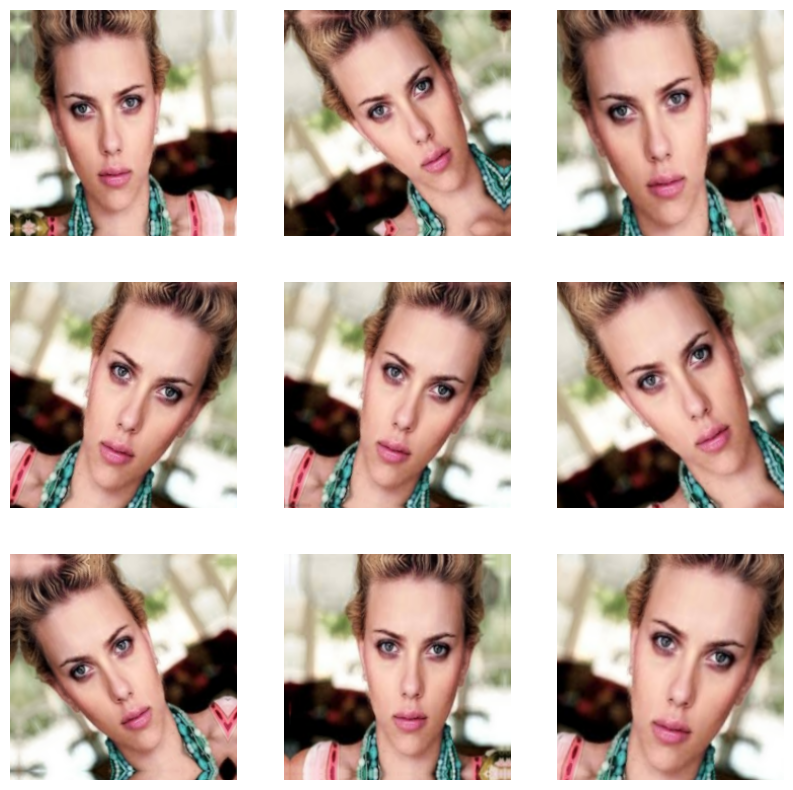

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

**Callbacks**

A ModelCheckpoint callback is defined to save the model's progress during training. It saves the weights of the model based on the validation accuracy.

In [ ]:
# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoint" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=1) # don't print out whether or not model is being saved

An EarlyStopping callback is imported to stop training early if the validation loss does not improve after a certain number of epochs.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

**Model: Conv2D**

First, the random seed is set for reproducibility. A convolutional neural network (CNN) model is then defined, consisting of several convolutional and pooling layers followed by a dense output layer. The model is compiled with the binary cross-entropy loss and the Adam optimizer. The model is trained on the training dataset for 15 epochs, and the training and validation metrics are recorded.

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Create a CNN model
model_conv = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_conv.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_aug = model_conv.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=train_data,
                        validation_steps=len(train_data))


Epoch 1/15
43/43 [==============================] - 6s 48ms/step - loss: 0.3781 - accuracy: 0.8157 - val_loss: 0.1096 - val_accuracy: 0.9658
Epoch 2/15
43/43 [==============================] - 1s 33ms/step - loss: 0.0904 - accuracy: 0.9731 - val_loss: 0.2002 - val_accuracy: 0.9177
Epoch 3/15
43/43 [==============================] - 2s 37ms/step - loss: 0.0925 - accuracy: 0.9701 - val_loss: 0.0510 - val_accuracy: 0.9825
Epoch 4/15
43/43 [==============================] - 1s 34ms/step - loss: 0.0575 - accuracy: 0.9825 - val_loss: 0.0450 - val_accuracy: 0.9898
Epoch 5/15
43/43 [==============================] - 1s 33ms/step - loss: 0.0675 - accuracy: 0.9767 - val_loss: 0.0453 - val_accuracy: 0.9883
Epoch 6/15
43/43 [==============================] - 1s 33ms/step - loss: 0.0415 - accuracy: 0.9862 - val_loss: 0.0257 - val_accuracy: 0.9913
Epoch 7/15
43/43 [==============================] - 1s 32ms/step - loss: 0.0335 - accuracy: 0.9905 - val_loss: 0.0574 - val_accuracy: 0.9840
Epoch 8/15
43

In [ ]:
# Check out the layers in our model
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                      

The model is evaluated on the test dataset to obtain the test loss and accuracy.

In [ ]:
model_conv_ev=model_conv.evaluate(test_data)
model_conv_ev

26/26 [==============================] - 2s 49ms/step - loss: 0.0105 - accuracy: 0.9975


[0.010479734279215336, 0.997533917427063]

The code initializes empty lists to store the true labels, predicted labels, and prediction probabilities for the test dataset. For each batch of images and labels in the test dataset, the true labels are extracted and added to the list. The model predicts the labels and stores the probabilities and rounded predictions in the respective lists.

In [ ]:
y_true = []
y_preds = []
y_probs = []  # Store the prediction probabilities

for images, labels in test_data:
    y_true.extend(labels.numpy())  # get the class labels
    preds = model_conv.predict(images)
    y_probs.extend(preds)  # Store the prediction probabilities
    y_preds.extend(np.round(preds).astype(int))  # round the probabilities to get the class predictions

1/1 [==============================] - 0s 80ms/step


The code imports the confusion_matrix function from scikit-learn and calculates the confusion matrix using the true and predicted labels.

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[397,   2],
       [  0, 412]])

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

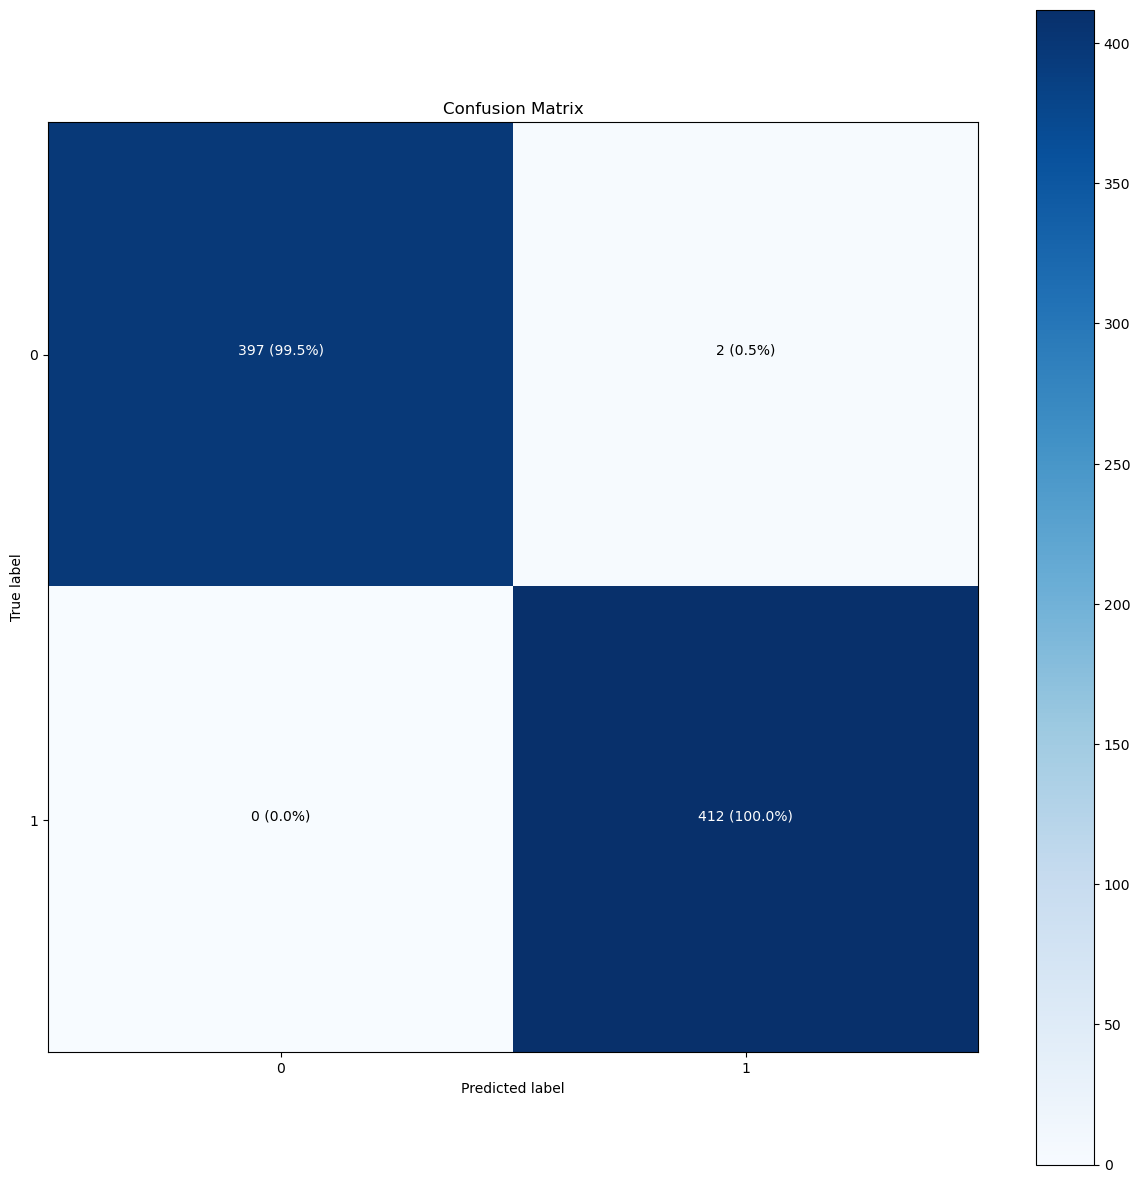

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Then, the 'plot_random_images' function generates and displays predictions on random samples.

In [ ]:
def plot_random_images(model, dataset, classes):
  """Picks random images, plots them and labels them with predicted and truth labels.

  Args:
    model: a trained model (trained on data similar to what's in dataset).
    dataset: a tf.data.Dataset object of (image, label) pairs.
    classes: array of class names for images.

  Returns:
    A grid plot of random images from `dataset` with predicted class labels from `model`
    as well as the truth class labels.
  """
  # Pick a random batch
  images, true_labels = next(iter(dataset.shuffle(1000)))

  # Setup 20 random integers
  indices = tf.random.uniform(shape=[20], minval=0, maxval=tf.shape(images)[0], dtype=tf.int32)

  fig, axes = plt.subplots(5, 4, figsize=(10, 10))  # We'll have 5 rows of 4 images each

  for i, ax in enumerate(axes.flat):
    # Create predictions and targets
    target_image = images[indices[i]]
    pred_probs = model.predict(target_image[tf.newaxis, ...], verbose=0)

    # Check the number of unique classes
    if len(classes) > 2:  # multiclass classification
      pred_label = classes[tf.argmax(pred_probs[0])]
      true_label = classes[tf.argmax(true_labels[indices[i]])]
    else:  # binary classification
      pred_label = classes[int(tf.round(tf.reduce_max(pred_probs[0])))]
      true_label = classes[int(tf.squeeze(true_labels[indices[i]]))]

    # Plot the target image
    ax.imshow(target_image.numpy().astype("uint8"))

    # Change the color of the titles depending on if the prediction is right or wrong
    color = "green" if pred_label == true_label else "red"

    # Add xlabel information (prediction/true label)
    ax.set_xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                       100*tf.reduce_max(pred_probs),
                                                       true_label),
                 color=color)

  plt.tight_layout()
  plt.show()


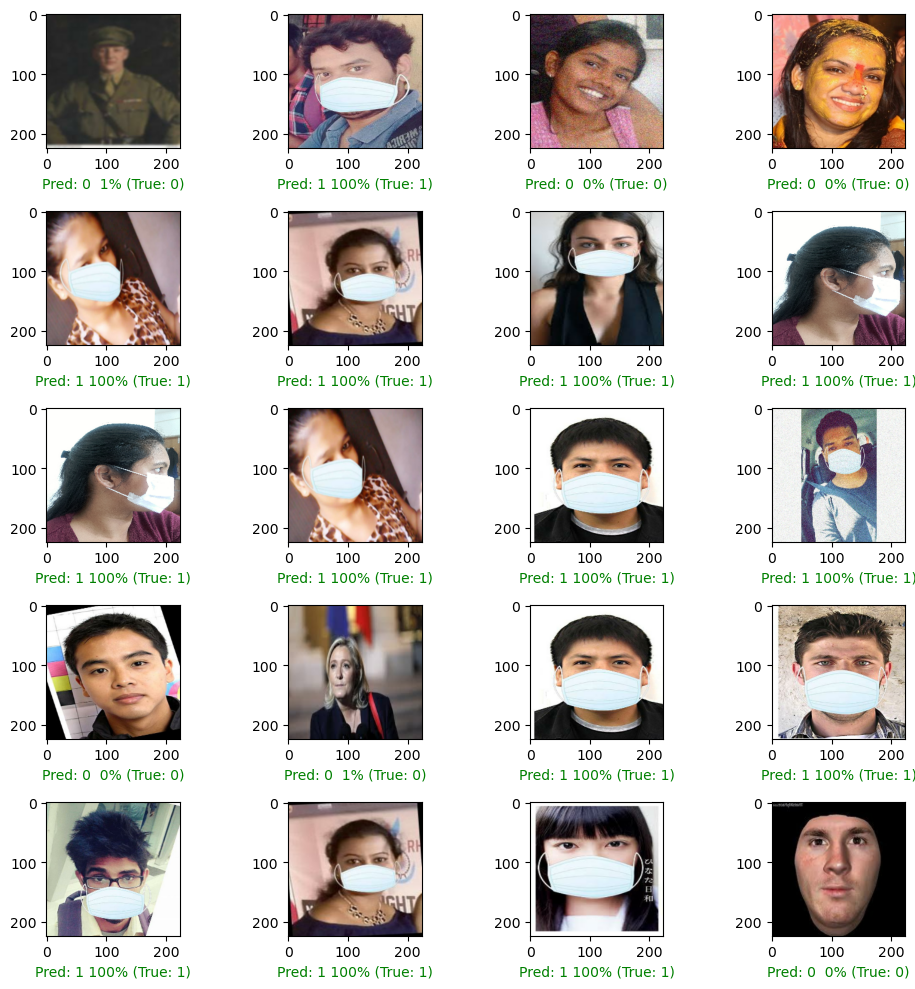

In [ ]:
plot_random_images(model=model_conv,
                   dataset=test_data,
                   classes=class_names)

The model's architecture is visualized using the plot_model function from TensorFlow.

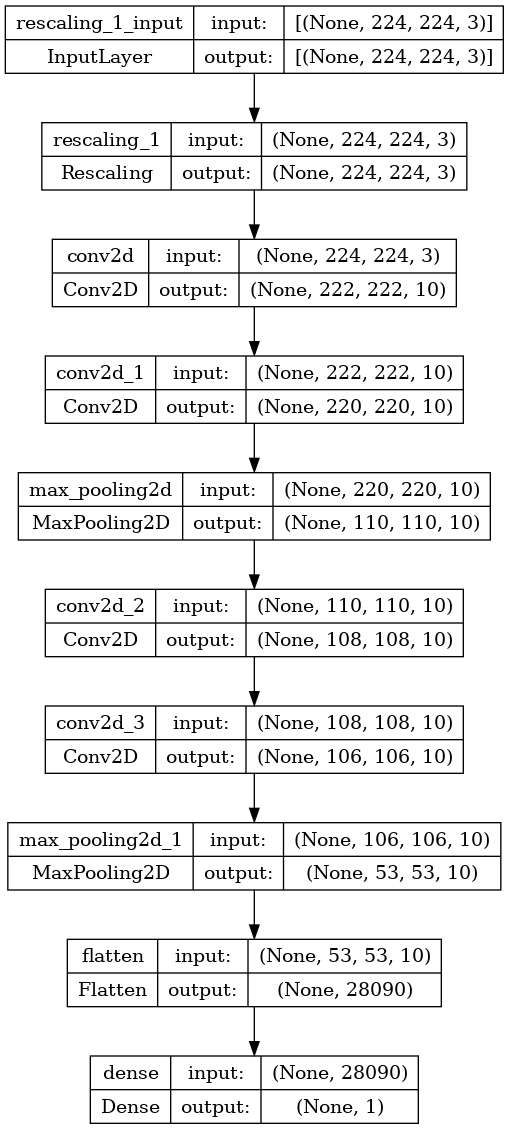

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_conv, show_shapes=True)

**Model: Flatten**

Now, a new model is created with only Flatten and Dense (with convolutional) layer, although with an increased number of hidden units and an extra layer. It is compiled and trained similar to the previous model.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_conv but add an extra layer and increase the number of hidden units in each layer
model_ft = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
  tf.keras.layers.Flatten(), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_ft.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_ft = model_ft.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
43/43 [==============================] - 3s 20ms/step - loss: 12.9350 - accuracy: 0.5819 - val_loss: 0.9789 - val_accuracy: 0.8064
Epoch 2/15
43/43 [==============================] - 1s 17ms/step - loss: 1.0724 - accuracy: 0.7757 - val_loss: 1.0922 - val_accuracy: 0.7472
Epoch 3/15
43/43 [==============================] - 1s 17ms/step - loss: 0.5310 - accuracy: 0.8529 - val_loss: 1.0258 - val_accuracy: 0.7263
Epoch 4/15
43/43 [==============================] - 1s 17ms/step - loss: 0.6303 - accuracy: 0.8281 - val_loss: 0.8594 - val_accuracy: 0.7509
Epoch 5/15
43/43 [==============================] - 1s 17ms/step - loss: 0.7358 - accuracy: 0.8405 - val_loss: 0.2401 - val_accuracy: 0.9371
Epoch 6/15
43/43 [==============================] - 1s 18ms/step - loss: 0.2253 - accuracy: 0.9235 - val_loss: 0.1997 - val_accuracy: 0.9236
Epoch 7/15
43/43 [==============================] - 1s 17ms/step - loss: 0.1285 - accuracy: 0.9548 - val_loss: 0.0792 - val_accuracy: 0.9655
Epoch 8/15
4

The evaluation of the new model on the test dataset is stored in a variable.

In [ ]:
model_ft_ev=model_ft.evaluate(test_data)
model_ft_ev

26/26 [==============================] - 0s 8ms/step - loss: 0.1291 - accuracy: 0.9482


[0.12911033630371094, 0.9482120871543884]

**Model: Conv2D, MaxPool2D + Augmented**

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Rescaling
from tensorflow.keras import Sequential

A CNN model, similar to Tiny VGG, is created for binary classification. It includes data augmentation, rescaling, convolutional, pooling, and dense layers. The model is compiled and trained on the training dataset.

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_aug = Sequential([
  data_augmentation,
  Rescaling(1./255, input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_aug.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_aug = model_aug.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/15
43/43 [==============================] - 4s 34ms/step - loss: 0.2899 - accuracy: 0.8857 - val_loss: 0.1291 - val_accuracy: 0.9494
Epoch 2/15
43/43 [==============================] - 1s 32ms/step - loss: 0.1030 - accuracy: 0.9680 - val_loss: 0.0945 - val_accuracy: 0.9642
Epoch 3/15
43/43 [==============================] - 1s 31ms/step - loss: 0.1059 - accuracy: 0.9680 - val_loss: 0.1069 - val_accuracy: 0.9729
Epoch 4/15
43/43 [==============================] - 1s 31ms/step - loss: 0.0893 - accuracy: 0.9716 - val_loss: 0.0883 - val_accuracy: 0.9716
Epoch 5/15
43/43 [==============================] - 1s 31ms/step - loss: 0.0719 - accuracy: 0.9774 - val_loss: 0.1199 - val_accuracy: 0.9729
Epoch 6/15
43/43 [==============================] - 1s 31ms/step - loss: 0.0681 - accuracy: 0.9803 - val_loss: 0.0954 - val_accuracy: 0.9667
Epoch 7/15
43/43 [==============================] - 1s 31ms/step - loss: 0.0733 - accuracy: 0.9818 - val_loss: 0.0611 - val_accuracy: 0.9778
Epoch 8/15
43

The evaluation of the model on the test dataset is stored in a variable.

In [ ]:
model_aug_ev=model_aug.evaluate(test_data)
model_aug_ev

26/26 [==============================] - 0s 11ms/step - loss: 0.0340 - accuracy: 0.9901


[0.03395938128232956, 0.9901356101036072]

A function is defined to plot the loss and accuracy curves for training and validation data from the model's history.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

The loss curves of a specific model are plotted using the defined function.

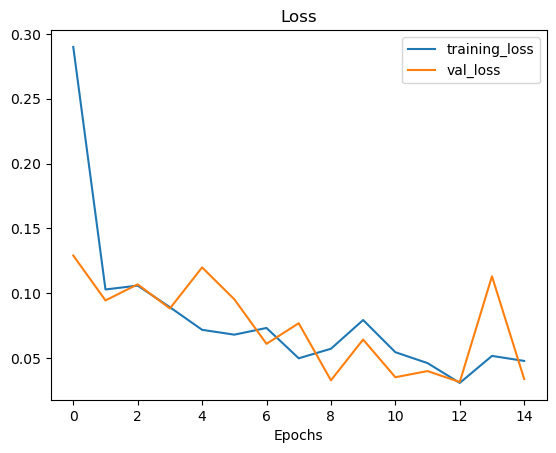

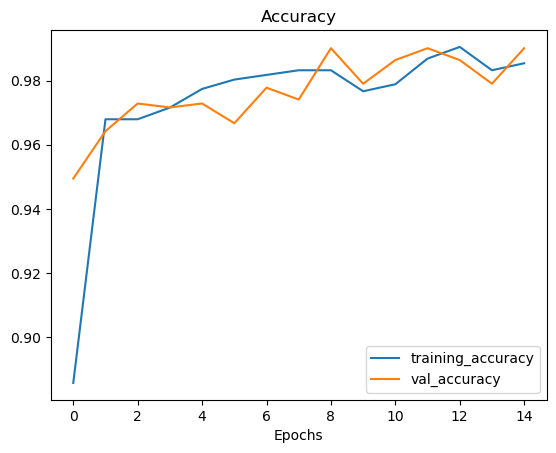

In [ ]:
# Check out the loss curves of model_aug
plot_loss_curves(history_aug)

In [ ]:
# Check out our model's architecture
model_aug.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                      

**Model: Big Conv2D**

The next code defines a convolutional neural network (CNN) model called model_conv_lg. It consists of multiple layers, including convolutional, batch normalization, pooling, dropout, and dense layers. The model is designed for image classification tasks and uses the ReLU activation function for the convolutional layers and the sigmoid activation function for the output layer. The input shape of the model is set to (224, 224, 3), representing the height, width, and color channels of the input images. The model's architecture is summarized.

In [ ]:
tf.random.set_seed(42)

model_conv_lg = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'), # first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name="model_conv_lg")

model_conv_lg.summary()

Model: "model_conv_lg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)   

The model is compiled with the binary cross-entropy loss function, the Adam optimizer, and the accuracy metric.

In [ ]:
# Compile the model
model_conv_lg.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

A ModelCheckpoint callback is created to save the model's weights based on the validation accuracy. The best weights are saved to a checkpoint file.

In [ ]:
# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoint_conv4" # saving weights requires ".ckpt" extension
mc = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
#                                                       save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=1) # don't print out whether or not model is being saved

The model is then fit to the training data for 15 epochs, using the training and test datasets. The training and validation steps are determined based on the length of the datasets. The ModelCheckpoint callback is used during training to save the best model weights.

In [ ]:
# Fit the model
history_conv_lg = model_conv_lg.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[mc])

Epoch 1/15


2023-07-09 23:28:34.973070: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_conv_lg/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


43/43 [==============================] - ETA: 0s - loss: 0.2004 - accuracy: 0.9235
Epoch 1: val_accuracy improved from -inf to 0.49199, saving model to model_checkpoint_conv4
43/43 [==============================] - 23s 350ms/step - loss: 0.2004 - accuracy: 0.9235 - val_loss: 4.4741 - val_accuracy: 0.4920
Epoch 2/15
43/43 [==============================] - ETA: 0s - loss: 0.0464 - accuracy: 0.9869
Epoch 2: val_accuracy did not improve from 0.49199
43/43 [==============================] - 6s 138ms/step - loss: 0.0464 - accuracy: 0.9869 - val_loss: 4.1708 - val_accuracy: 0.4920
Epoch 3/15
43/43 [==============================] - ETA: 0s - loss: 0.0418 - accuracy: 0.9862
Epoch 3: val_accuracy did not improve from 0.49199
43/43 [==============================] - 6s 137ms/step - loss: 0.0418 - accuracy: 0.9862 - val_loss: 7.2647 - val_accuracy: 0.4920
Epoch 4/15
43/43 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9883
Epoch 4: val_accuracy did not improve from 0.49

The best model's evaluation is performed on the test dataset, and the evaluation results are printed.

In [ ]:
# Load in best version of model and evaluate on the test data
model_conv_lg = tf.keras.models.load_model(checkpoint_path)
model_conv_lg.evaluate(test_data)

26/26 [==============================] - 1s 25ms/step - loss: 0.0054 - accuracy: 0.9988


[0.005420229863375425, 0.9987669587135315]

The plot_loss_curves function is called to plot the loss curves for training and validation data, based on the history of the training process.

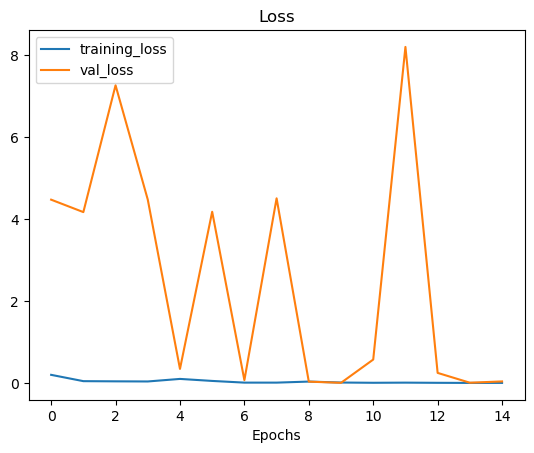

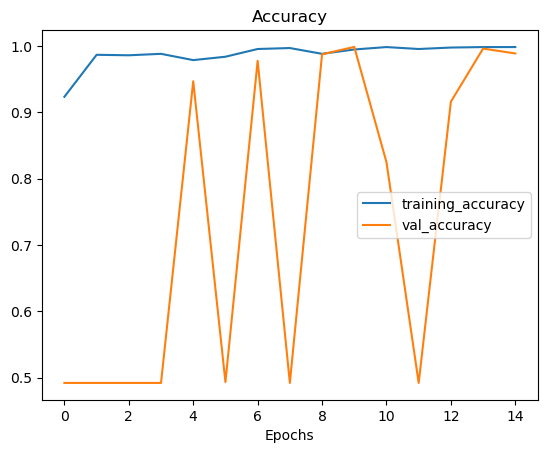

In [ ]:
# # Check model's performance history training on augmented data
plot_loss_curves(history_conv_lg)

The evaluation of the model on the test dataset is stored in a variable.

In [ ]:
y_true = []
y_preds = []
y_probs = []  # Store the prediction probabilities

for images, labels in test_data:
    y_true.extend(labels.numpy())  # get the class labels
    preds = model_conv_lg.predict(images)
    y_probs.extend(preds)  # Store the prediction probabilities
    y_preds.extend(np.round(preds).astype(int))  # round the probabilities to get the class predictions

1/1 [==============================] - 0s 27ms/step


The code imports the confusion_matrix function from scikit-learn and calculates the confusion matrix using the true and predicted labels.

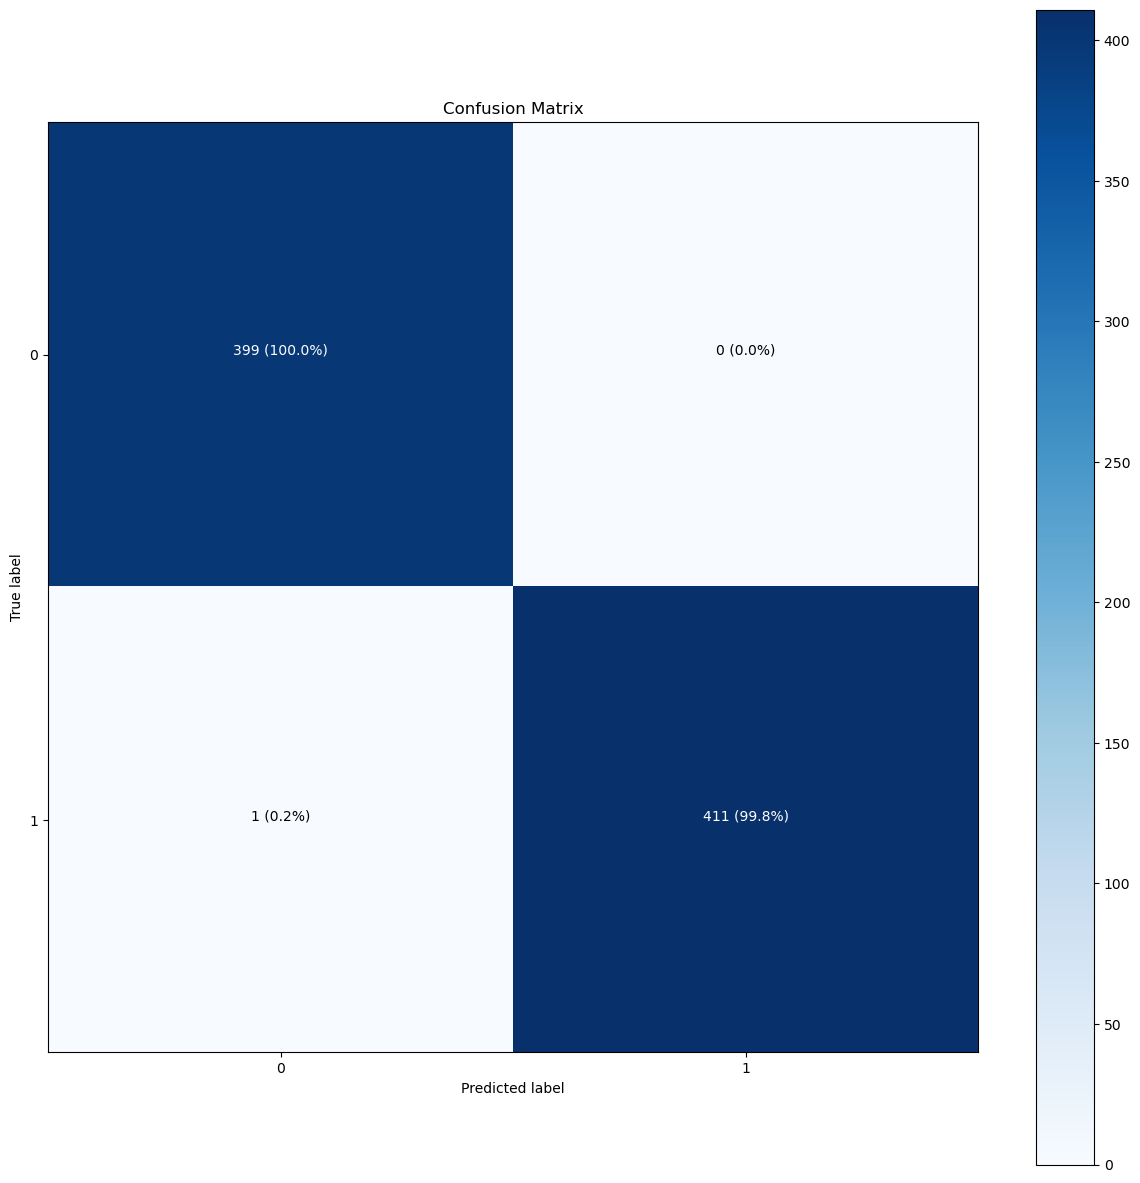

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Then, the 'plot_random_images' function generates and displays predictions on random samples.

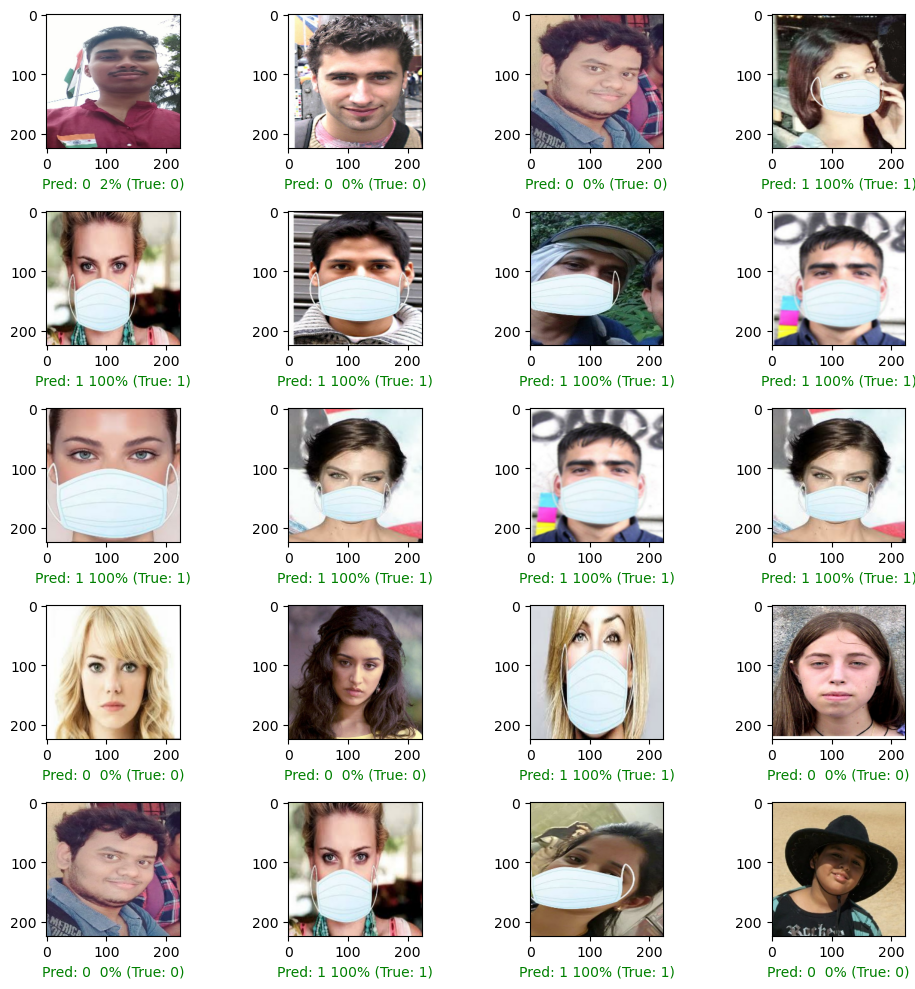

In [ ]:
plot_random_images(model=model_conv_lg,
                   dataset=test_data,
                   classes=class_names)

**Model: MobileNet**

The next code imports the MobileNet model from the TensorFlow applications module. The mobilenet model is created as a sequential model. It includes a rescaling layer, the MobileNet model (pretrained on ImageNet), a global average pooling layer, and a dense output layer. The input shape of the model is set to (224, 224, 3). The model's architecture is summarized.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers.experimental.preprocessing import Resizing

In [ ]:
from tensorflow.keras.applications import MobileNet

INP_SHAPE = (224, 224, 3)

mobilenet = Sequential()
mobilenet.add(Rescaling(1./255, input_shape=INP_SHAPE))  # add the rescaling layer
mobilenet.add(MobileNet(include_top=False, weights='imagenet'))  # add the MobileNet model
mobilenet.add(layers.GlobalAveragePooling2D())  # to reduce the dimensionality of the outputs
mobilenet.add(layers.Dense(1, activation='sigmoid'))  # the final layer

mobilenet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_9 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


A checkpoint callback is created to save the model's weights based on the validation accuracy.

In [ ]:
# Create checkpoint callback to save model for later use
checkpoint_path = "model_checkpoint"
cc = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                        # save_weights_only=True, # save only the model weights
                                        monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                        save_best_only=True,
                                        verbose=1) # only keep the best model weights on file (delete the rest)

The model is compiled with the binary cross-entropy loss function, the Adam optimizer, and the accuracy metric. The model is then fit to the training data for 15 epochs, using the training and test datasets. The ModelCheckpoint callback is used during training to save the best model weights.

In [ ]:
# Compile the model
mobilenet.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_mobilenet = mobilenet.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[cc])

Epoch 1/15
43/43 [==============================] - ETA: 0s - loss: 0.1081 - accuracy: 0.9701
Epoch 1: val_accuracy improved from -inf to 0.54994, saving model to model_checkpoint
43/43 [==============================] - 36s 472ms/step - loss: 0.1081 - accuracy: 0.9701 - val_loss: 13.3079 - val_accuracy: 0.5499
Epoch 2/15
43/43 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.54994 to 0.98027, saving model to model_checkpoint
43/43 [==============================] - 18s 417ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2172 - val_accuracy: 0.9803
Epoch 3/15
43/43 [==============================] - ETA: 0s - loss: 2.4795e-04 - accuracy: 1.0000
Epoch 3: val_accuracy improved from 0.98027 to 0.99137, saving model to model_checkpoint
43/43 [==============================] - 18s 426ms/step - loss: 2.4795e-04 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9914
Epoch 4/15
43/43 [==============================]

The saved best performing model is loaded, and its evaluation is performed on the test dataset.

In [ ]:
# Load in saved best performing results_fx and evaluate on test data
mobilenet = tf.keras.models.load_model(checkpoint_path)

In [ ]:
mn_ev1=mobilenet.evaluate(test_data)
mn_ev1

26/26 [==============================] - 1s 28ms/step - loss: 1.7631e-04 - accuracy: 1.0000


[0.00017630548973102123, 1.0]

The code initializes empty lists to store the true labels, predicted labels, and prediction probabilities for the test dataset. For each batch of images and labels in the test dataset, the true labels are extracted and added to the list. The model predicts the labels and stores the probabilities and rounded predictions in the respective lists.

In [ ]:
y_true = []
y_preds = []
y_probs = []  # Store the prediction probabilities

for images, labels in test_data:
    y_true.extend(labels.numpy())  # get the class labels
    preds = mobilenet.predict(images)
    y_probs.extend(preds)  # Store the prediction probabilities
    y_preds.extend(np.round(preds).astype(int))  # round the probabilities to get the class predictions

1/1 [==============================] - 0s 448ms/step


The code imports the confusion_matrix function from scikit-learn and calculates the confusion matrix using the true and predicted labels.

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[399,   0],
       [  0, 412]])

A new confusion matrix is created to offer a visual perspective of the classification model's performance, which is further refined for readability using a custom function.

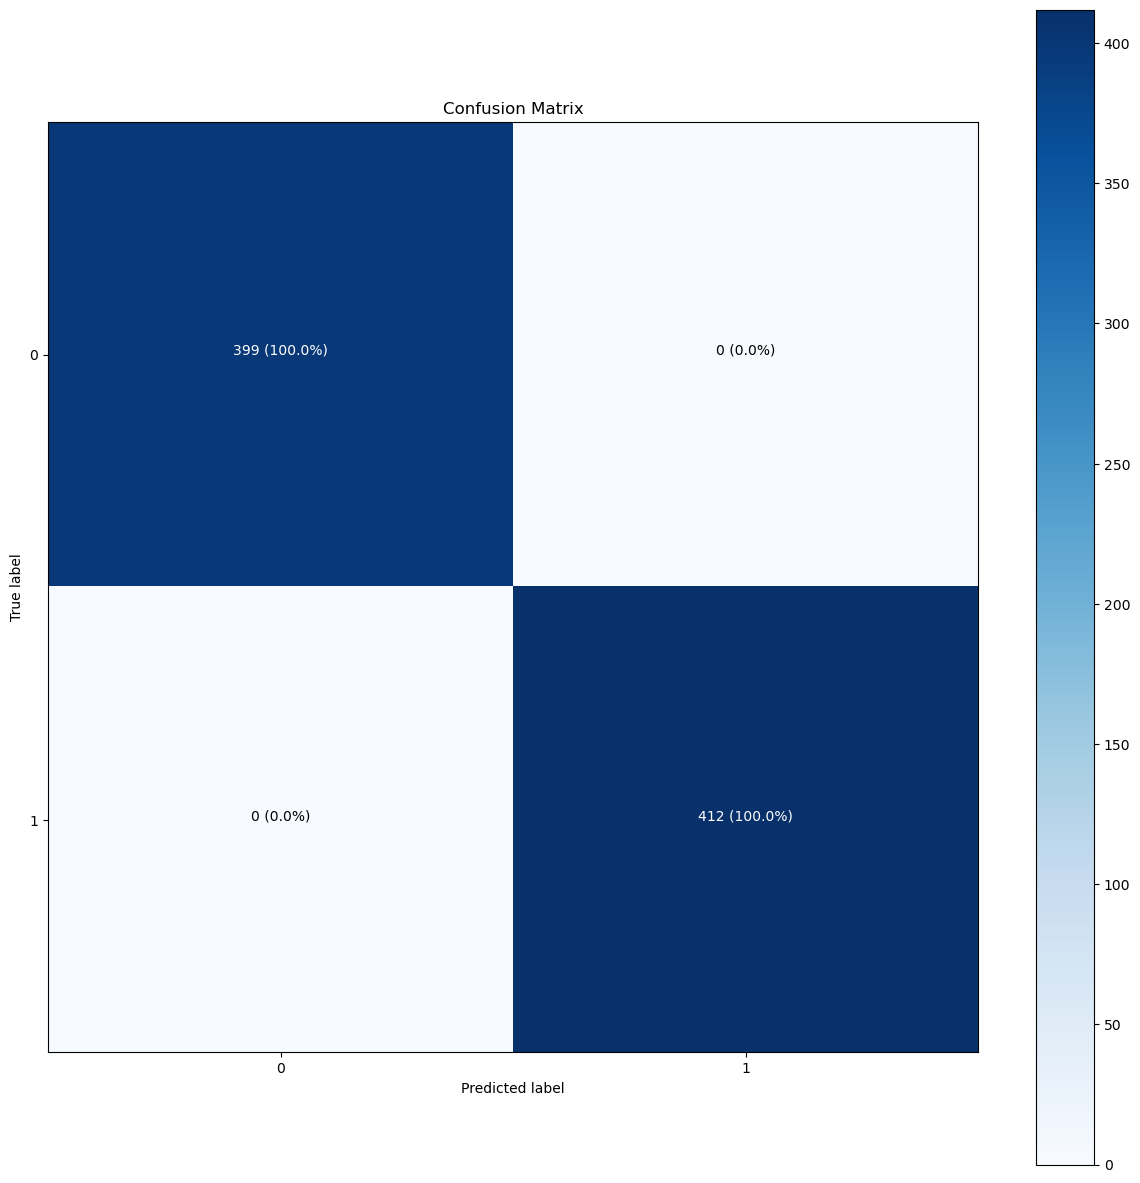

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Then, the 'plot_random_images' function generates and displays predictions on random samples.

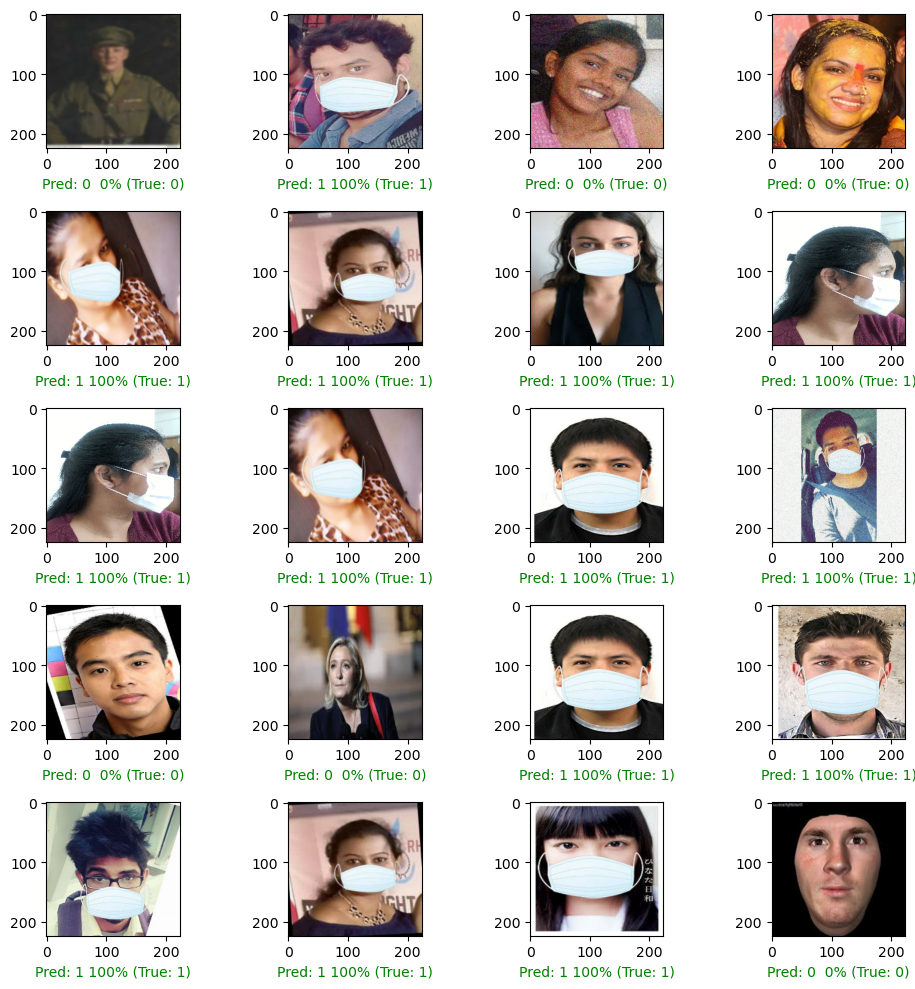

In [ ]:
plot_random_images(model=mobilenet,
                   dataset=test_data,
                   classes=class_names)

**Model: Inception v3- pick output layer**

The next code downloads the weights file for the Inception V3 model.

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /kaggle/working/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-07-09 23:34:13--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/kaggle/working/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/kaggle/working/inc 100%[===================>]  83.84M   216MB/s    in 0.4s    

2023-07-09 23:34:13 (216 MB/s) - ‘/kaggle/working/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



The InceptionV3 model is imported from the TensorFlow applications module.

In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/kaggle/working/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

A function called create_pre_trained_model is defined to initialize the InceptionV3 model. It takes the path to the local pre-trained weights file as an argument. The function loads the weights into the model and sets all the layers in the model as non-trainable.

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras.layers import Rescaling

def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """

  pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
      layer.trainable = False

  return pre_trained_model

The pre_trained_model is created using the create_pre_trained_model function and the local weights file. The model's summary is printed.

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_14 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 111, 111, 32  96         ['conv2d_14[0][0]']              
 rmalization)                   )                                                      

The total number of parameters and trainable parameters in the pre-trained model are printed.

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


The function output_of_last_layer takes a pre-trained model as input and returns the output of its last layer.

In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

The last_output is obtained by calling the output_of_last_layer function with the pre_trained_model as input.

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 12, 12, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In the next code block, we import necessary libraries and define a function create_final_model that appends a custom model to the pre-trained model. The custom model includes a flatten layer, a fully connected layer with 1024 hidden units and ReLU activation, a dropout layer, and a final sigmoid layer for classification. The complete model is compiled with the RMSprop optimizer, binary cross-entropy loss, and accuracy metric.

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers

def create_final_model(pre_trained_model, last_output):
  """
  Appends a custom model to a pre-trained model

  Args:
    pre_trained_model (tf.keras Model): model that will accept the train/test inputs
    last_output (tensor): last layer output of the pre-trained model

  Returns:
    model: the combined model
  """
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  # Add a final sigmoid layer for classification
  x = layers.Dense(1, activation='sigmoid')(x)

  # Create the complete model by using the Model class
  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

The model is created by calling the create_final_model function with the pre_trained_model and last_output as inputs.

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 122,223,521 total parameters in this model.
There are 113,248,257 trainable parameters in this model.


The code defines a custom callback class called myCallback that stops training when the validation accuracy reaches 99.9%. The on_epoch_end method is used to check the validation accuracy and stop training if the threshold is met.

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

The next code applies the normalization layer to the test dataset, ensuring pixel values are between 0 and 1. The pixel values of the first image in the normalized test dataset are then printed for verification.

In [ ]:
normalized_ds_test = test_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds_test))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


Now we will perform the following code to train the model using the fit function. The fit function takes the training and test datasets, the number of epochs, and the callbacks as input. The callbacks are passed to the callbacks parameter.

In [ ]:
history = model.fit(normalized_ds,
                    validation_data = normalized_ds_test,
                    epochs = 15,
                    verbose = 1,
                    callbacks=callbacks)

Epoch 1/15
43/43 [==============================] - 10s 131ms/step - loss: 0.2188 - accuracy: 0.9548 - val_loss: 0.0057 - val_accuracy: 0.9975
Epoch 2/15
43/43 [==============================] - 4s 83ms/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.0036 - val_accuracy: 0.9975
Epoch 3/15
43/43 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9971
Reached 99.9% accuracy so cancelling training!
43/43 [==============================] - 4s 84ms/step - loss: 0.0068 - accuracy: 0.9971 - val_loss: 8.6651e-04 - val_accuracy: 1.0000


The code plots the training and validation accuracies over epochs to analyze the model's performance. The visualization helps identify overfitting or underfitting.

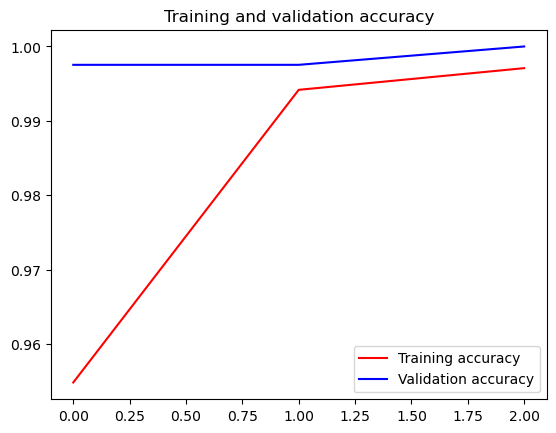

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the training and validation accuracies for each epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

The code initializes lists to store true labels, predicted labels, and prediction probabilities. It iterates over the normalized test dataset, extracts labels, makes predictions, and stores the results. These lists facilitate further analysis, such as generating a confusion matrix.

In [ ]:
y_true = []
y_preds = []
y_probs = []  # Store the prediction probabilities

for images, labels in normalized_ds_test:
    y_true.extend(labels.numpy())  # get the class labels
    preds = model.predict(images)
    y_probs.extend(preds)  # Store the prediction probabilities
    y_preds.extend(np.round(preds).astype(int))  # round the probabilities to get the class predictions

1/1 [==============================] - 0s 33ms/step


The code imports the confusion_matrix function from scikit-learn and calculates the confusion matrix using the true and predicted labels.

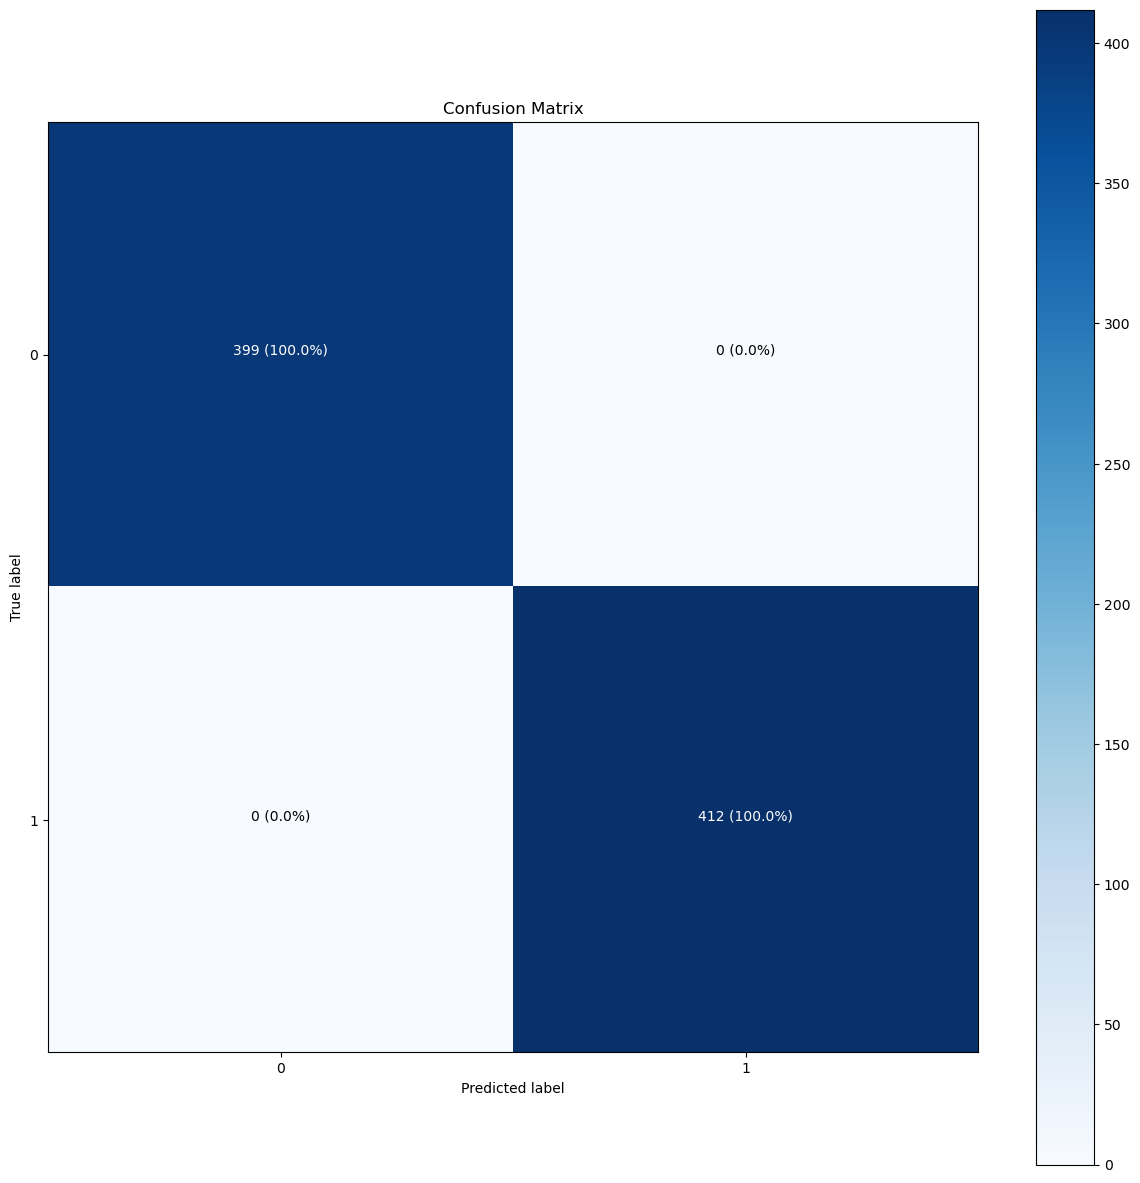

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Model Comparison**

In [ ]:
# Evaluate the models
eval_model_fl  = model_ft.evaluate(test_data, verbose=0)
eval_model_conv = model_conv.evaluate(test_data, verbose=0)
eval_model_2 = model_aug.evaluate(test_data, verbose=0)
eval_model_ft = mobilenet.evaluate(test_data, verbose=0)
eval_model_4 = model.evaluate(normalized_ds_test, verbose=0)
eval_model_5 = model_conv_lg.evaluate(test_data, verbose=0)

# Create a dataframe to store the evaluation results
df_model = pd.DataFrame({
    'Model': ['model_ft', 'model_conv', 'model_aug', 'mobilenet', 'model_inception', 'model_conv_lg'],
    'Loss': [eval_model_fl[0], eval_model_conv[0], eval_model_2[0], eval_model_ft[0], eval_model_4[0], eval_model_5[0]],  # Include loss for Model Conv4
    'Accuracy': [eval_model_fl[1], eval_model_conv[1], eval_model_2[1], eval_model_ft[1], eval_model_4[1], eval_model_5[1]]   # Include accuracy for Model Conv4
})

# Sort by accuracy
df_model = df_model.sort_values('Accuracy', ascending=False)

df_model


Model      Loss  Accuracy
3        mobilenet  0.000176  1.000000
4  model_inception  0.000867  1.000000
5    model_conv_lg  0.005420  0.998767
1       model_conv  0.010480  0.997534
2        model_aug  0.033959  0.990136
0         model_ft  0.129110  0.948212

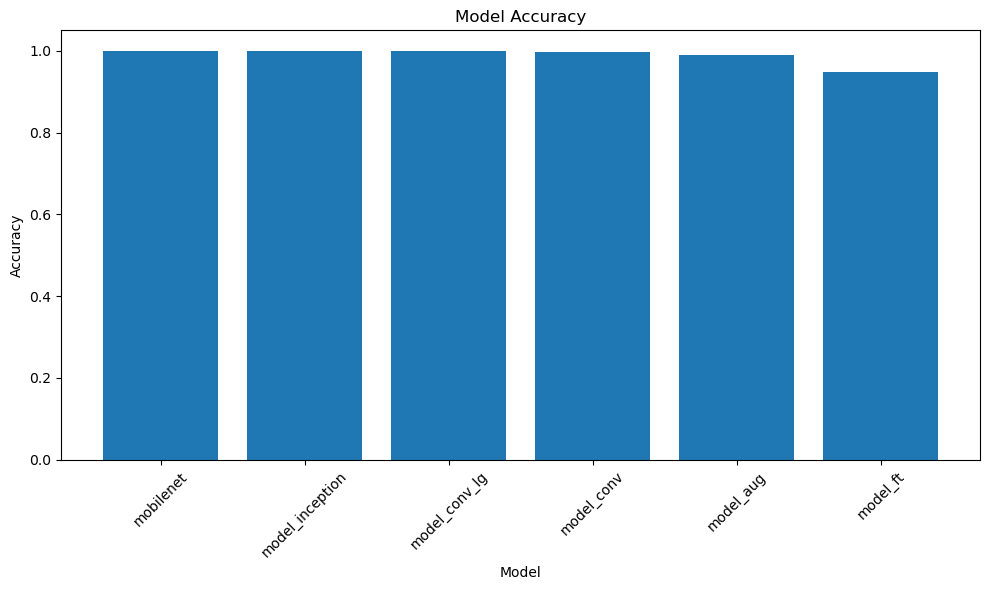

In [ ]:
# Sort by accuracy
df_model = df_model.sort_values('Accuracy', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_model['Model'], df_model['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the results, the highest accuracy models are "mobilenet" and "model_inception," both achieving a perfect accuracy score of 1.0. These models exhibit excellent performance on the test data. The model with the next highest accuracy is "model_conv_lg" with an accuracy of 0.998767 and a relatively low loss value of 0.005420. The "model_conv" follows with an accuracy of 0.997534 and a loss value of 0.010480. Although slightly lower, both models still demonstrate strong performance. The "model_aug" achieves an accuracy of 0.990136, indicating decent performance with a loss value of 0.033959. Finally, the "model_ft" has the lowest accuracy among the evaluated models, with an accuracy of 0.948212 and a loss value of 0.129110.